# NammaMetro Ridership EDA

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Let's take a closer look at what NammaMetro has been dishing out so far

In [102]:
filename = "NammaMetro_Ridership_Dataset.csv"
df = pd.read_csv(filename, index_col=0)
df['Record Date'] = pd.to_datetime(df['Record Date'], format='%d-%m-%Y').dt.strftime("%Y-%m-%d")
df.tail()

,Record Date,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm
16,2024-11-15,444111,443160,668,85,198,211495,10644,413,180093,51089,94929,34075.0
17,2024-11-16,331695,330501,1001,118,75,263563,8092,1311,232090,62453,126066,43571.0
18,2024-11-18,363367,362433,674,105,155,231636,8835,833,188268,51191,101196,35881.0
19,2024-11-19,483984,483232,476,117,159,205106,12331,761,186931,52306,98035,36590.0
20,2024-11-21,476275,475487,440,159,189,198205,12056,830,180890,50723,94482,35685.0


The [Namma Metro Ridership stats page](https://english.bmrc.co.in/ridership/) publishes a breakdown of payment methods used daily by passengers entering the system.
![ridership_plot](nammametro_datapage.png)

   Record Date  Total Riders
7   2024-11-03        536524
8   2024-11-05        839653
9   2024-11-06        846784
10  2024-11-09        748885
11  2024-11-10        654523
12  2024-11-11        878225
13  2024-11-12        856588
14  2024-11-13        866647
15  2024-11-14        871758
16  2024-11-15        846756
17  2024-11-16        836751
18  2024-11-18        792939
19  2024-11-19        889113
20  2024-11-21        868256


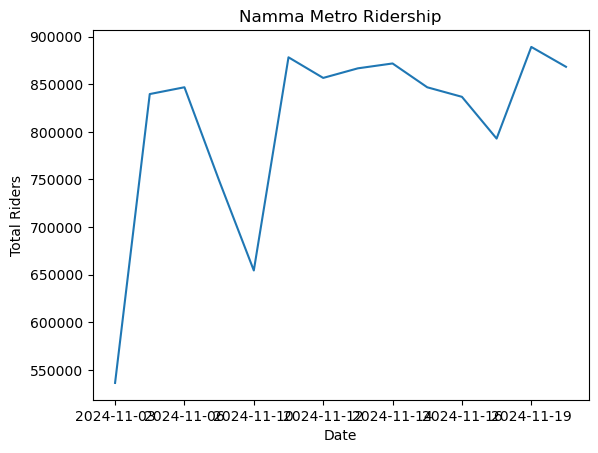

In [103]:
df['Total Riders'] = df.loc[:, ['Total Smart Cards', 'Tokens', 'Total NCMC', 'Group Ticket', 'Total QR']].sum(axis=1)
table = df[['Record Date', 'Total Riders']]
print(table.tail(14))
table.tail(14).plot(x='Record Date', 
           y='Total Riders', 
           kind='line', 
           title='Namma Metro Ridership', 
           xlabel='Date', 
           ylabel='Total Riders', 
           legend=False)
plt.show()

### Let's make a cleaner graph for the last 14 days of available data.

   Record Date  Total Riders
7   2024-11-03        536524
8   2024-11-05        839653
9   2024-11-06        846784
10  2024-11-09        748885
11  2024-11-10        654523
12  2024-11-11        878225
13  2024-11-12        856588
14  2024-11-13        866647
15  2024-11-14        871758
16  2024-11-15        846756
17  2024-11-16        836751
18  2024-11-18        792939
19  2024-11-19        889113
20  2024-11-21        868256


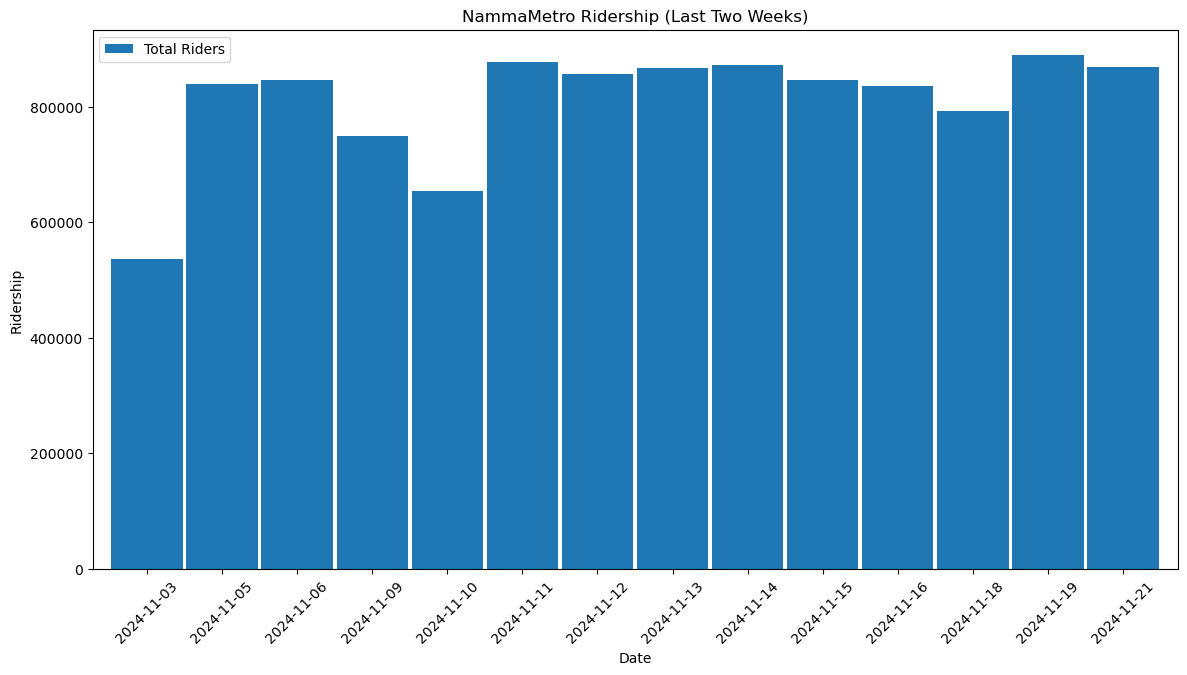

In [104]:
# df['Day of Month'] = pd.to_datetime(df['Record Date'], format='%Y-%m-%d').dt.day
table = df[['Record Date', 'Total Riders']].tail(14)
print(table)
table.plot(x='Record Date', 
           y='Total Riders', 
           kind='bar', 
           xlabel='Date', 
           ylabel='Ridership', 
           title='NammaMetro Ridership (Last Two Weeks)', 
           figsize=(14,7), 
           width=0.95,
           legend=True,
           rot=45)
plt.show()

### Note the gaps in the data. 
NammaMetro fails to report ridership numbers on some days. Is someone updating the page manually?! 
Let's get a better understanding of that missing data.

In [105]:
# Generate a dataframe with last n sequential dates

from datetime import date, timedelta
number_of_days = 14
start_date = date.today() - timedelta(number_of_days, 0, 0)
dates = pd.DataFrame({'Record Date': [str(start_date+timedelta(n)) for n in range(number_of_days)]})

In [106]:
# Merge the original df with the column of dates to get all values including nulls

last_N_days = df.merge(dates, how='right', on='Record Date')
last_N_days.drop(['Stored Value Card', 'One Day Pass', 'Three Day Pass', 'Five Day Pass', 'QR NammaMetro', 'QR WhatsApp', 'QR Paytm'], axis=1, inplace=True)
last_N_days.rename(columns={'Total Smart Cards':'Smart Cards', 'Total NCMC':'NCMC', 'Total QR':'QR Scan', 'Total Riders':'Total Users'}, inplace=True)

formatted_dates = pd.to_datetime(last_N_days['Record Date'], format='%Y-%m-%d').dt.day
formatted_numbers = last_N_days.loc[:, 'Smart Cards':].astype('Int64')

last_N_days = pd.concat([formatted_dates, formatted_numbers], axis=1)
last_N_days

,Record Date,Smart Cards,Tokens,NCMC,Group Ticket,QR Scan,Total Users
0,9,324351,242952,3145,477,177960,748885
1,10,175159,262652,4351,805,211556,654523
2,11,464358,218340,11685,964,182878,878225
3,12,475075,193049,12160,605,175699,856588
4,13,472363,204021,12056,1090,177117,866647
5,14,471099,207693,11858,348,180760,871758
6,15,444111,211495,10644,413,180093,846756
7,16,331695,263563,8092,1311,232090,836751
8,17,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,18,363367,231636,8835,833,188268,792939


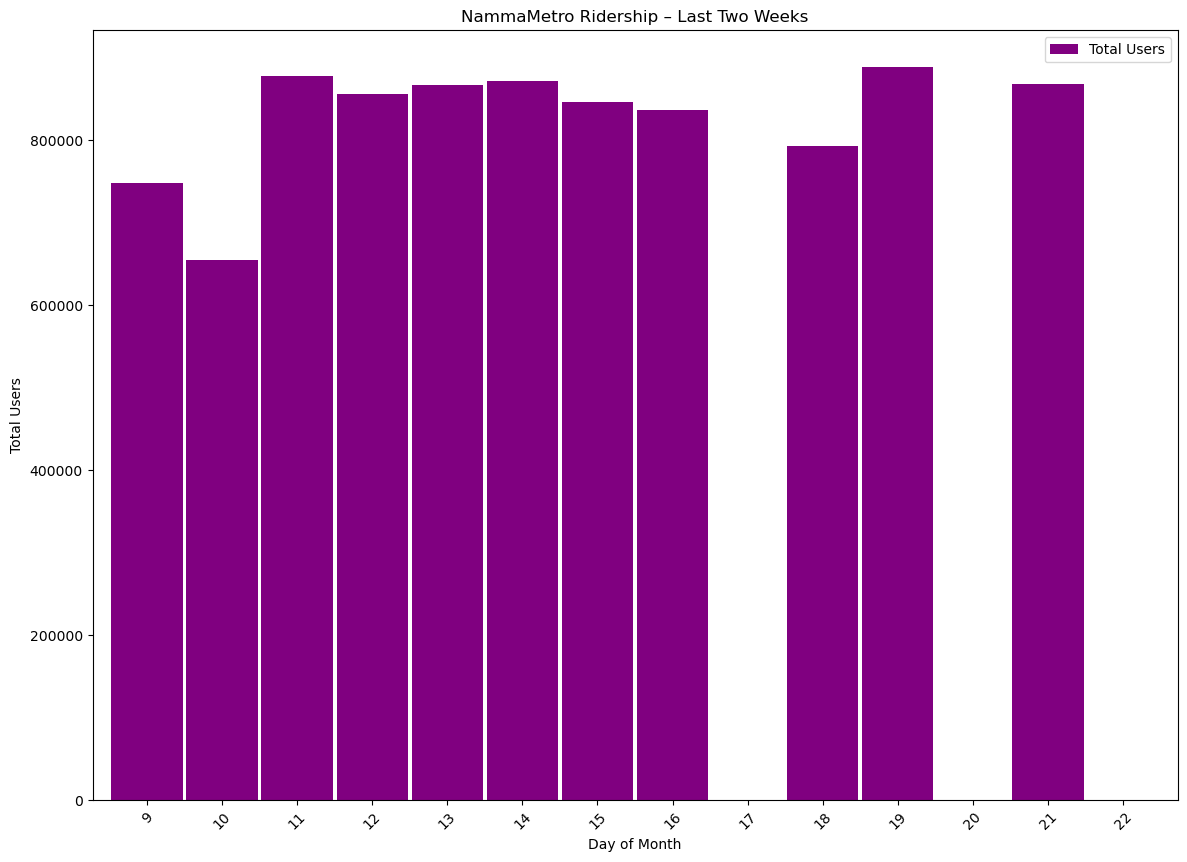

In [107]:
last_N_days.plot(x='Record Date',
                 y='Total Users',
                 kind='bar',
                 xlabel='Day of Month',
                 ylabel='Total Users',
                 title='NammaMetro Ridership – Last Two Weeks', 
                 figsize=(14,10),
                 width=0.95,
                 color='purple',
                 legend=True,
                 rot=45)
plt.show()

### Looks like a mouth with quite a few broken teeth!

What sort of data imputations makes sense here? When the dataset grows large enough over several months, I would fill unreported dates with an average of similar days, e.g. If a weekday Tuesday was missing, take the average of the last 4 available weekday Tuesdays.

In [108]:
last_N_days = last_N_days.loc[:, 'Record Date':'QR Scan'].melt(
                    id_vars=['Record Date'], 
                    value_vars=['Smart Cards', 'Tokens', 'NCMC', 'Group Ticket', 'QR Scan'], 
                    var_name='Access System', 
                    value_name='Count').sort_values(by=['Record Date', 'Access System'])
last_N_days = last_N_days[['Record Date', 'Access System', 'Count']].reset_index(drop=True)
last_N_days.tail(20)

,Record Date,Access System,Count
50,19,Group Ticket,761
51,19,NCMC,12331
52,19,QR Scan,186931
53,19,Smart Cards,483984
54,19,Tokens,205106
55,20,Group Ticket,<NA>
56,20,NCMC,<NA>
57,20,QR Scan,<NA>
58,20,Smart Cards,<NA>
59,20,Tokens,<NA>


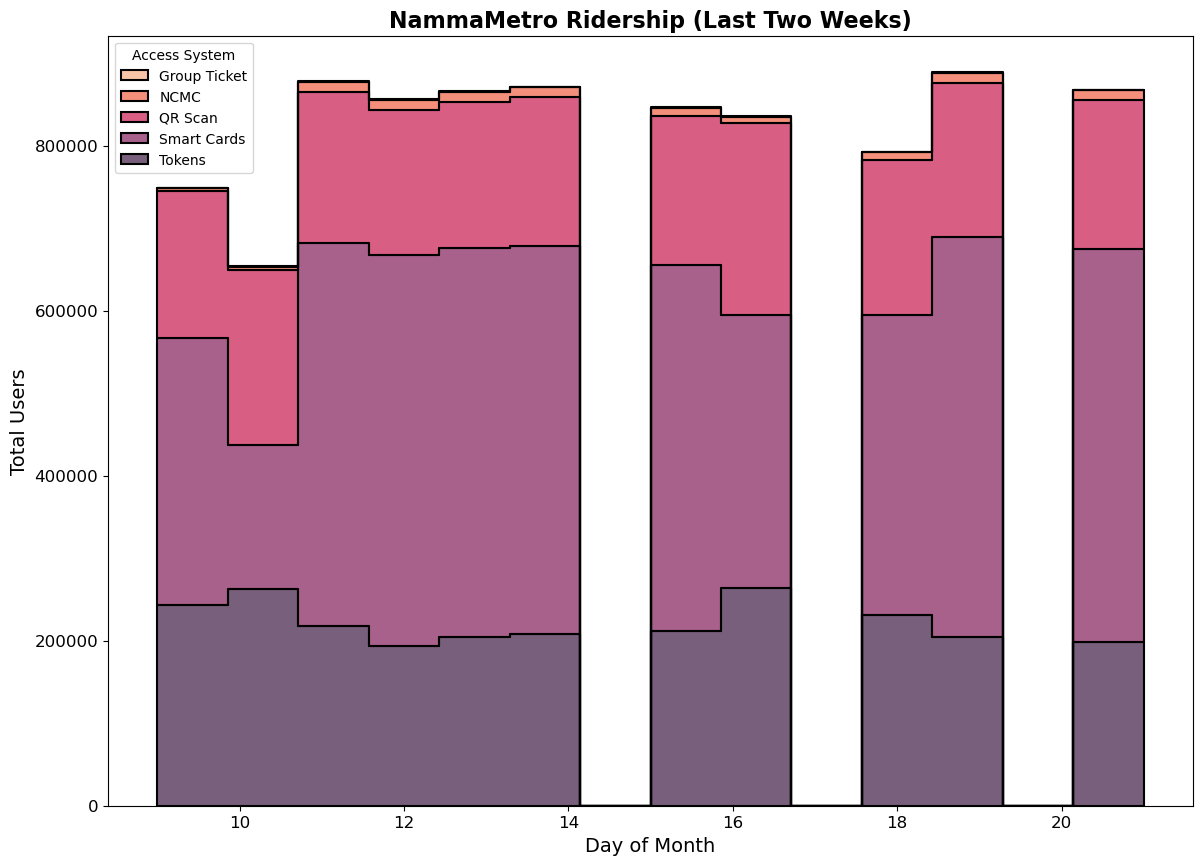

In [109]:
plt.figure(figsize=(14,10))
sns.histplot(data=last_N_days,
             x='Record Date',
             weights='Count',
             bins=14,
             hue='Access System',
             multiple='stack', 
             element='step',
             palette='rocket_r',
             legend=True,
             common_norm=True,
             stat='count',
             linewidth=1.5,
             alpha=0.7)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.title('NammaMetro Ridership (Last Two Weeks)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()